In [1]:
# EEG NN

In [2]:
## Import Libs

In [260]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import pywt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.externals import joblib
import pickle
from keras.models import model_from_json
#tf.enable_eager_execution()

In [146]:
## Variables And Constants

In [147]:
skipFeatures = 300

In [148]:
## Read Stored Data

In [149]:
df = pd.read_csv("C:\\Users\\Kruspe\\rawData_evenmore.csv")
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v992,v993,v994,v995,v996,v997,v998,v999,v1000,label
0,48,48,49,48,49,49,49,49,49,49,...,35,3,3,3,3,3,3,3,3,right
1,21,21,21,33,33,33,33,33,33,33,...,23,23,23,23,23,23,23,23,44,left
2,35,35,35,35,35,35,35,35,35,35,...,18,18,18,18,18,18,18,18,18,left
3,33,33,33,33,13,13,13,13,13,13,...,41,41,41,41,41,41,41,41,41,left
4,66,66,66,66,66,66,66,66,66,66,...,36,36,36,36,36,36,36,36,36,left


In [150]:
## Scale Features

In [151]:
scaler = preprocessing.StandardScaler()

In [152]:
df.iloc[:,skipFeatures:1000] = scaler.fit_transform(df.iloc[:,skipFeatures:1000])

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [153]:
joblib.dump(scaler , 'scaler.pkl')     # save to disk

['scaler.pkl']

In [154]:
#scaler = joblib.load('my_scaler.pkl')  # load from disk

In [155]:
## Plot Average Data

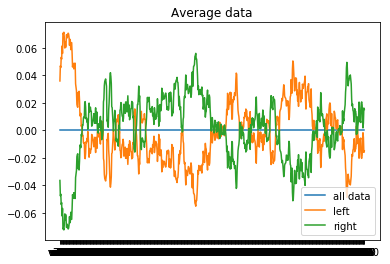

In [166]:
rdf = df.iloc[:,skipFeatures:1000]
lrdf = rdf[df.label=='left']
rrdf = rdf[df.label=='right']
rdfm = rdf.mean(axis=0)
lrdfm = lrdf.mean(axis=0)
rrdfm = rrdf.mean(axis=0)
plt.plot(rdfm, label="all data") 
plt.plot(lrdfm, label="left") 
plt.plot(rrdfm, label="right") 
plt.legend()
plt.title("Average data")
plt.show() 

In [137]:
## Plot Differencies

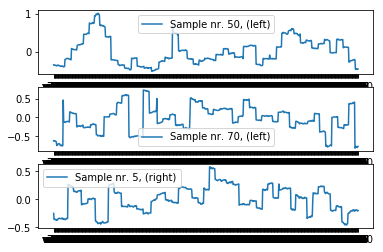

In [167]:
x = np.array([])
input1 = rdf.iloc[50]
v = "Sample nr. 50, (%s)" % (df.iloc[50].label)
plt.subplot(3,1,1)
plt.plot(input1, label=v)
plt.legend()
x = np.array([])
input2 = rdf.iloc[70]
v = "Sample nr. 70, (%s)" % (df.iloc[70].label)
plt.subplot(3,1,2)
plt.plot(input2, label=v)
plt.legend()
input3 = rdf.iloc[5]
v = "Sample nr. 5, (%s)" % (df.iloc[5].label)
plt.subplot(3,1,3)
plt.plot(input3, label=v)
plt.legend()
plt.show()

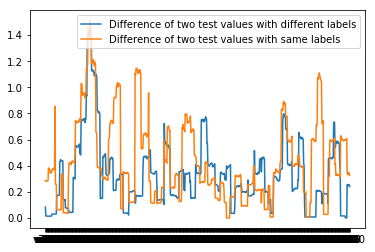

In [139]:
# Needs to be customized based on data
diff = input1-input3
diff2 = input1-input2
plt.plot(np.absolute(diff), label="Difference of two test values with different labels")
plt.plot(np.absolute(diff2), label="Difference of two test values with same labels")
plt.legend()
plt.show()

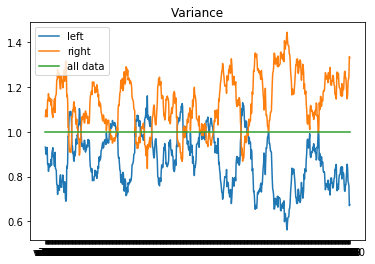

In [168]:
plt.plot(np.var(lrdf, axis=0), label="left")
plt.plot(np.var(rrdf, axis=0), label="right")
plt.plot(np.var(rdf, axis=0), label="all data")
plt.legend()
plt.title("Variance")
plt.show()

In [18]:
## Standard Deviation

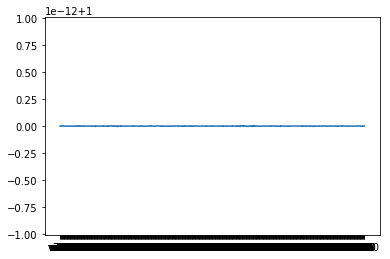

In [169]:
plt.plot(np.std(rdf, axis=0))

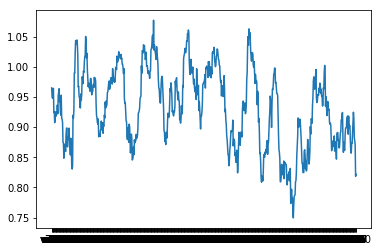

In [170]:
plt.plot(np.std(rdf[df.label=='left'], axis=0))

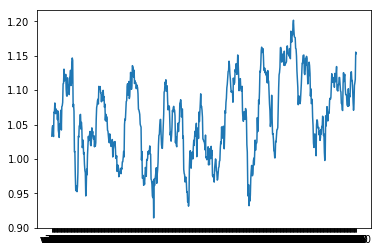

In [171]:
plt.plot(np.std(rdf[df.label=='right'], axis=0))

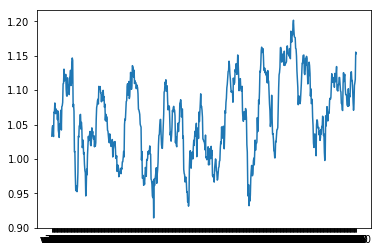

In [172]:
plt.plot(np.std(rrdf, axis=0))

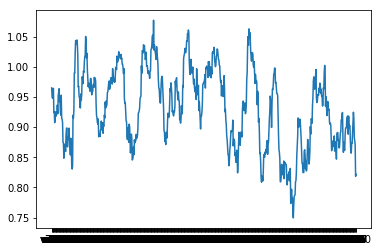

In [173]:
plt.plot(np.std(lrdf, axis=0))

In [24]:
##Fast Fourier Transform

In [174]:
tfc, tfv = rdf.shape
matrix = rdf.to_numpy()

In [175]:
ff = np.zeros(shape=(tfc,tfv), dtype=complex)
c = 0;
for f in matrix:
    x = np.array([])
    for e in f:
        x = np.append(x, int(e))
    ff[c] = np.fft.fft(x)
    c = c+1

C:\Users\Kruspe\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


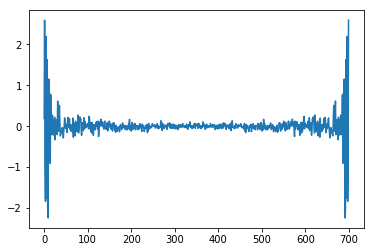

In [176]:
ffm = ff.mean(axis=0)
plt.plot(ffm) 
plt.show() 

In [28]:
##WaveDecomposition

In [177]:
cA2a = np.empty(shape=(tfc,17), dtype=complex)
cD1a = np.empty(shape=(tfc,17), dtype=complex)
cD2a = np.empty(shape=(tfc,28), dtype=complex)
cD3a = np.empty(shape=(tfc,50), dtype=complex)
cD4a = np.empty(shape=(tfc,93), dtype=complex)
cD5a = np.empty(shape=(tfc,180), dtype=complex)
cD6a = np.empty(shape=(tfc,353), dtype=complex)
i = 0;
for w in ff:
    coeffs = pywt.wavedec(w, 'db4', level=6)
    cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs
    cA2a[i] = cD1
    cD1a[i] = cA2
    cD2a[i] = cD2
    cD3a[i] = cD3
    cD4a[i] = cD4
    cD5a[i] = cD5
    cD6a[i] = cD6
    i = i+1
#ca = np.append(ca, coeffs)
#ca = np.append(ca, coeffs)
#for wd in ff:
    #coeffs = pywt.wavedec(x, 'db4', level=6)
    #cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

In [178]:
print (cA2.shape,cD1.shape,cD2.shape,cD3.shape,cD4.shape,cD5.shape, cD6.shape)

(17,) (17,) (28,) (50,) (93,) (180,) (353,)


In [179]:
##Average Channel Values

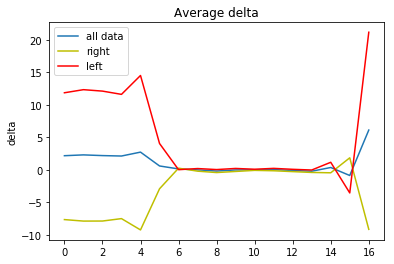

In [180]:
cD1am = cD1a.mean(axis=0)
cD1aml = cD1a[df.label=="left"].mean(axis=0)
cD1amr = cD1a[df.label=="right"].mean(axis=0)
plt.plot(cD1am, label="all data") 
plt.plot(cD1amr, 'y', label="right") 
plt.plot(cD1aml, 'r', label="left") 
plt.ylabel("delta")
plt.legend()
plt.title("Average delta")
plt.show() 

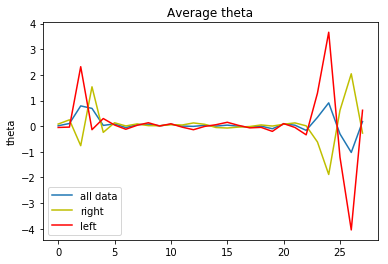

In [181]:
cD2am = cD2a.mean(axis=0)
cD2aml = cD2a[df.label=="left"].mean(axis=0)
cD2amr = cD2a[df.label=="right"].mean(axis=0)
plt.plot(cD2am, label="all data") 
plt.plot(cD2amr, 'y', label="right") 
plt.plot(cD2aml, 'r', label="left") 
plt.ylabel("theta")
plt.legend()
plt.title("Average theta")
plt.show() 

In [182]:
cD2am = cD2a.mean(axis=0)
cD2aml = cD2a[df.label=="left"].mean(axis=0)

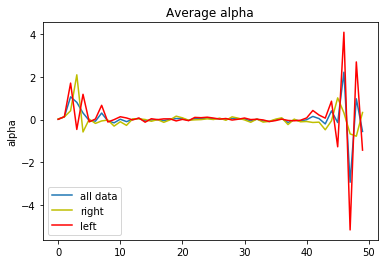

In [183]:
cD3am = cD3a.mean(axis=0)
cD3aml = cD3a[df.label=="left"].mean(axis=0)
cD3amr = cD3a[df.label=="right"].mean(axis=0)
plt.plot(cD3am, label="all data") 
plt.plot(cD3amr, 'y', label="right") 
plt.plot(cD3aml, 'r', label="left") 
plt.ylabel("alpha")
plt.legend()
plt.title("Average alpha")
plt.show() 

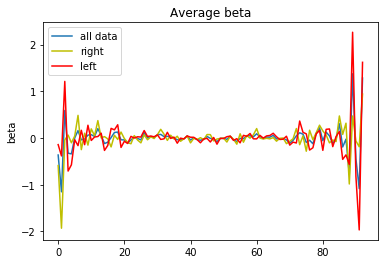

In [184]:
cD4am = cD4a.mean(axis=0)
cD4aml = cD4a[df.label=="left"].mean(axis=0)
cD4amr = cD4a[df.label=="right"].mean(axis=0)
plt.plot(cD4am, label="all data") 
plt.plot(cD4amr, 'y', label="right") 
plt.plot(cD4aml, 'r', label="left") 
plt.ylabel("beta")
plt.legend()
plt.title("Average beta")
plt.show() 

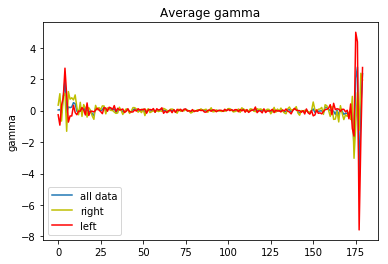

In [185]:
cD5am = cD5a.mean(axis=0)
cD5aml = cD5a[df.label=="left"].mean(axis=0)
cD5amr = cD5a[df.label=="right"].mean(axis=0)
plt.plot(cD5am, label="all data") 
plt.plot(cD5amr, 'y', label="right") 
plt.plot(cD5aml, 'r', label="left") 
plt.ylabel("gamma")
plt.legend()
plt.title("Average gamma")
plt.show() 

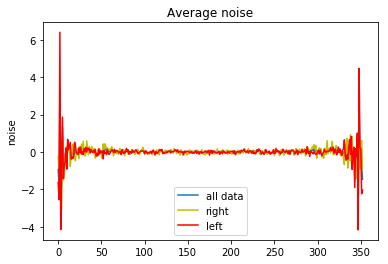

In [186]:
cD6am = cD6a.mean(axis=0)
cD6aml = cD6a[df.label=="left"].mean(axis=0)
cD6amr = cD6a[df.label=="right"].mean(axis=0)
plt.plot(cD6am, label="all data") 
plt.plot(cD6amr, 'y', label="right") 
plt.plot(cD6aml, 'r', label="left") 
plt.ylabel("noise")
plt.legend()
plt.title("Average noise")
plt.show() 

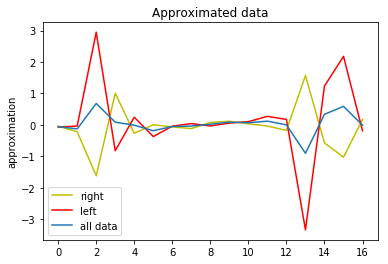

In [187]:
cA2am = cA2a.mean(axis=0)
cA2aml = cA2a[df.label=="left"].mean(axis=0)
cA2amr = cA2a[df.label=="right"].mean(axis=0)
plt.plot(cA2amr, 'y', label="right") 
plt.plot(cA2aml, 'r', label="left") 
plt.plot(cA2am, label="all data") 
plt.ylabel("approximation")
plt.legend()
plt.title("Approximated data")
plt.show() 

In [188]:
approx_real = cA2a.real
approx_imag = cA2a.imag

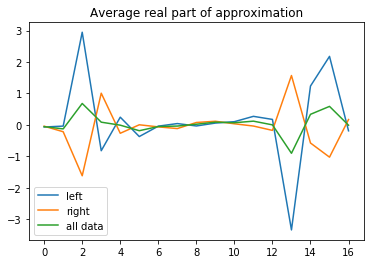

In [189]:
plt.plot(approx_real[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_real[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_real.mean(axis=0), label="all data")
plt.legend()
plt.title("Average real part of approximation")
plt.show()

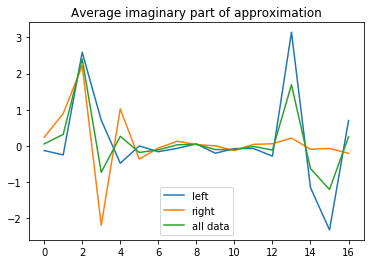

In [190]:
plt.plot(approx_imag[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_imag[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_imag.mean(axis=0), label="all data")
plt.legend()
plt.title("Average imaginary part of approximation")
plt.show()

In [191]:
## Defining NN Input

In [192]:
approx_imag.shape

(2150, 17)

In [193]:
approx_imag = approx_imag.astype(np.float32)

In [194]:
cD2a = cD2a.astype(np.float32)

C:\Users\Kruspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [195]:
delta = cD1a.real.astype(np.float32)

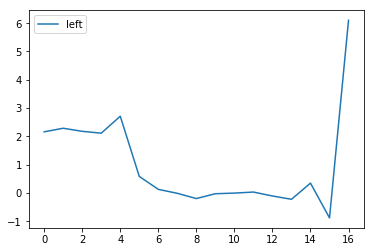

In [196]:
plt.plot(delta.mean(axis=0), label="left")
plt.legend()
plt.show()

In [197]:
## Setting up NN

In [108]:
X = df.iloc[:,skipFeatures:1000].values
y = df.iloc[:,1000].map({"left":0,"right":1}).values

In [109]:
## Renaming labels

In [362]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
from keras.utils.np_utils import to_categorical
encoder.fit(y)
Y = encoder.transform(y)
Y = to_categorical(Y)

In [906]:
## Splitting data

In [363]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=10)

In [206]:
## Keras

In [276]:
model = Sequential()

In [277]:
from keras.regularizers import l1, l2
model.add(Dense(700,input_shape=(700,),activation='tanh'))
model.add(Dense(30,activation='tanh'))# activity_regularizer=l1(0.2)))
model.add(Dense(30,activation='tanh'))#, activity_regularizer=l2(0.2)))
model.add(Dense(2,activation='softmax'))

In [278]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

In [279]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 700)               490700    
_________________________________________________________________
dense_155 (Dense)            (None, 30)                21030     
_________________________________________________________________
dense_156 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_157 (Dense)            (None, 2)                 62        
Total params: 512,722
Trainable params: 512,722
Non-trainable params: 0
_________________________________________________________________


In [280]:
## Train NN

In [281]:
model.fit(X_train,y_train,epochs=5, batch_size = 32)

Epoch 1/5
1935/1935 [==============================] - 3s 1ms/step - loss: 0.7647 - acc: 0.4904
Epoch 2/5
1935/1935 [==============================] - 2s 979us/step - loss: 0.7371 - acc: 0.5013
Epoch 3/5
1935/1935 [==============================] - 1s 671us/step - loss: 0.7200 - acc: 0.4966
Epoch 4/5
1935/1935 [==============================] - 1s 682us/step - loss: 0.7416 - acc: 0.4879
Epoch 5/5
1935/1935 [==============================] - 1s 694us/step - loss: 0.7367 - acc: 0.4982


In [249]:
## Predict Test Set

In [282]:
y_pred = model.predict(X_test)

In [283]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [284]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46       115
           1       0.43      0.49      0.46       100

   micro avg       0.46      0.46      0.46       215
   macro avg       0.46      0.46      0.46       215
weighted avg       0.46      0.46      0.46       215

[[50 65]
 [51 49]]


In [285]:
y_pred_class

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

In [286]:
#init_op = tf.global_variables_initializer()
#
## Add ops to save and restore all the variables.
#saver = tf.train.Saver()

In [ ]:
#with tf.Session() as sess:
#  sess.run(init_op)
#  save_path = saver.save(sess, "/tmp/model.ckpt")
#  print("Model saved in file: %s" % save_path)

In [287]:
#v = np.array([], dtype=object)
v = X_train.astype('object')
v2 = y_train.astype('object')

In [290]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
print('lda - ',accuracy_score(clf_predict,y_test))

lda -  0.4930232558139535


In [944]:
from sklearn.svm import SVC
clf = SVC(gamma='scale')
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
print('svc - ',accuracy_score(clf_predict,y_test))

svc -  0.5117647058823529


In [947]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
print('lsvc - ',accuracy_score(clf_predict,y_test))

lsvc -  0.5235294117647059


C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [53]:
from sklearn.svm import NuSVC

In [292]:
clf = NuSVC(gamma='scale')
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
print('nusvc - ',accuracy_score(clf_predict,y_test))

nusvc -  0.5441860465116279


In [291]:
clf_predict = clf.predict(X_test)
print('nusvc - ',accuracy_score(clf_predict,y_test))

nusvc -  0.4930232558139535


In [63]:
from sklearn.svm import NuSVR

In [293]:
clf = NuSVR(gamma='scale')
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
clf_predict = np.rint(clf_predict)
print('nusvc - ',accuracy_score(clf_predict,y_test))

nusvc -  0.5395348837209303


In [71]:
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    pickle.dump(clf, fid)    

# load it again
with open('classifier.pkl', 'rb') as fid:
    clf = pickle.load(fid)

In [69]:
type(clf)

sklearn.svm.classes.NuSVR

In [992]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X_train,y_train)
clf_predict = clf.predict(X_test)
clf_predict = np.rint(clf_predict)
print('svr - ',accuracy_score(clf_predict,y_test))

svr -  0.5294117647058824


In [950]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [937]:
LDA = LinearDiscriminantAnalysis(n_components=700) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
LDA.fit(X_train,y_train)
LDA_predict = LDA.predict(X_test)
print('lda - ',accuracy_score(LDA_predict,y_test))

lda -  0.4823529411764706


In [295]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_test)
print('lr - ',accuracy_score(lr_predict,y_test))

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr -  0.5162790697674419


In [317]:
sampleID = 33
rtd = X_test[sampleID].reshape(1, -1)
rttv = np.array([], dtype='int64')
rttv = np.append(rttv, y_test[sampleID] )
lr_predict = lr_model.predict(rtd)
#lr_predict = np.rint(lr_predict)
print('lr - ',accuracy_score(lr_predict,rttv))

lr -  1.0


In [324]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3,leaf_size=10)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [325]:
from sklearn.metrics import accuracy_score 
knn_predict = knn_model.predict(X_test)
print('knn - ',accuracy_score(knn_predict,y_test))

knn -  0.5069767441860465


In [330]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_predict = nb_model.predict(X_test)
print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.5488372093023256


In [332]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_leaf_nodes=2)
dt_model.fit(X_train,y_train)
dt_predict = dt_model.predict(X_test)
print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.5395348837209303


In [333]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(X_train,y_train)
rfc_predict = rfc_model.predict(X_test)
print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.5581395348837209


C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [335]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier(n_estimators = 700)
etc_model.fit(X_train,y_train)
etc_predict = etc_model.predict(X_test)
print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))

Extra Tree Classifier -  0.5441860465116279


In [336]:
from xgboost.sklearn import XGBClassifier
xg_model = XGBClassifier()
xg_model = xg_model.fit(X_train,y_train)
xg_model.score(X_test, y_test)

0.5255813953488372

In [364]:
from keras.layers import Dropout

In [365]:
shallow_model = Sequential()
shallow_model.add(Dense( 700, input_dim=700, activation = 'relu'))
shallow_model.add(Dense( units = 2100, activation= 'relu'))
shallow_model.add(Dropout(0.2))
shallow_model.add(Dense( units = 2, activation= 'softmax'))
shallow_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [369]:
shallow_history = shallow_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Train on 1935 samples, validate on 215 samples
Epoch 1/10
1935/1935 [==============================] - 3s 2ms/step - loss: 0.6339 - acc: 0.6512 - val_loss: 0.7323 - val_acc: 0.5907
Epoch 2/10
1935/1935 [==============================] - 3s 2ms/step - loss: 0.5995 - acc: 0.6755 - val_loss: 0.8546 - val_acc: 0.5023
Epoch 3/10
1935/1935 [==============================] - 4s 2ms/step - loss: 0.5571 - acc: 0.7173 - val_loss: 0.9086 - val_acc: 0.5256
Epoch 4/10
1935/1935 [==============================] - 3s 2ms/step - loss: 0.5880 - acc: 0.7070 - val_loss: 1.0511 - val_acc: 0.4930
Epoch 5/10
1935/1935 [==============================] - 3s 2ms/step - loss: 0.6103 - acc: 0.6915 - val_loss: 0.9956 - val_acc: 0.4977
Epoch 6/10
1935/1935 [==============================] - 4s 2ms/step - loss: 0.5456 - acc: 0.7390 - val_loss: 1.0477 - val_acc: 0.5070
Epoch 7/10
1935/1935 [==============================] - 4s 2ms/step - loss: 0.5608 - acc: 0.7437 - val_loss: 1.1825 - val_acc: 0.5349
Epoch 8/10
1935

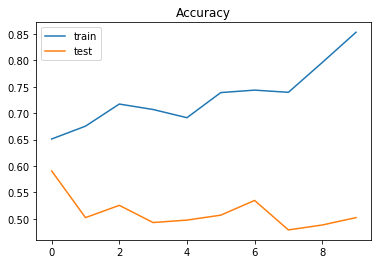

In [371]:
plt.plot(shallow_history.history['acc'])
plt.plot(shallow_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

In [376]:
from sklearn.preprocessing import LabelBinarizer
y_test2 = LabelBinarizer().fit_transform(y_test)

In [233]:
from keras import optimizers

In [372]:
deep_model = Sequential()
deep_model.add(Dense( 700, input_dim=700, activation = 'relu'))
deep_model.add(Dense( units = 34,kernel_initializer='uniform', activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu', activity_regularizer=l1(0.2)))
deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 2,kernel_initializer='uniform', activation= 'softmax'))
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [373]:
deep_history = deep_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Train on 1935 samples, validate on 215 samples
Epoch 1/10
1935/1935 [==============================] - 5s 3ms/step - loss: 2.4589 - acc: 0.4755 - val_loss: 0.7689 - val_acc: 0.5209
Epoch 2/10
1935/1935 [==============================] - 2s 1ms/step - loss: 0.9232 - acc: 0.4610 - val_loss: 0.7486 - val_acc: 0.5302
Epoch 3/10
1935/1935 [==============================] - 2s 792us/step - loss: 0.6934 - acc: 0.4935 - val_loss: 0.7395 - val_acc: 0.4651
Epoch 4/10
1935/1935 [==============================] - 2s 789us/step - loss: 0.6932 - acc: 0.4951 - val_loss: 0.7391 - val_acc: 0.5349
Epoch 5/10
1935/1935 [==============================] - 2s 876us/step - loss: 0.6932 - acc: 0.4724 - val_loss: 0.7391 - val_acc: 0.5302
Epoch 6/10
1935/1935 [==============================] - 2s 789us/step - loss: 0.6932 - acc: 0.4910 - val_loss: 0.7390 - val_acc: 0.5349
Epoch 7/10
1935/1935 [==============================] - 2s 816us/step - loss: 0.6932 - acc: 0.5003 - val_loss: 0.7391 - val_acc: 0.5349
Epoch

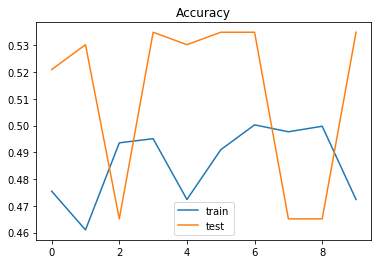

In [376]:
plt.plot(deep_history.history['acc'])
plt.plot(deep_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

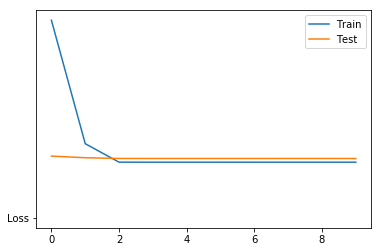

In [377]:
plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [700]:
dft = df.values
Xt = dft[:,skipFeatures:1000]
yt = dft[:,1000]

In [589]:
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=1000, random_state=seed)
    cv_results = model_selection.cross_val_score(model, Xt, yt, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

KeyboardInterrupt: 

In [341]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [251]:
Xts, yts = make_regression(n_samples=1500, n_features=700, noise=4.0, random_state=0)

In [343]:
reg = LinearRegression().fit(X_train, y_train)

In [344]:
reg_predict = reg.predict(X_test)
reg_predict = np.rint(reg_predict)
print('REG - ',accuracy_score(reg_predict,y_test))

REG -  0.4697674418604651


In [345]:
reg.score(X_train, y_train)

0.35442876489518227

In [342]:
reg = TheilSenRegressor(random_state=0).fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
reg_predict = reg.predict(X_test)
reg_predict = np.rint(reg_predict)
print('REG - ',accuracy_score(reg_predict,y_test))

In [346]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('SGD - ',accuracy_score(clf_predict,y_test))

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGD -  0.5069767441860465


In [347]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(nu=0.1,gamma=0.1)
svm.fit(X_train, y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [348]:
svm_predict = svm.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('svm - ',accuracy_score(svm_predict,y_test))

svm -  0.018604651162790697


In [349]:
from sklearn.svm import NuSVC

In [350]:
clf = NuSVC(gamma='auto')
clf.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [351]:
clf_predict = clf.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('SGD - ',accuracy_score(clf_predict,y_test))

SGD -  0.5395348837209303


In [353]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [354]:
q = QuadraticDiscriminantAnalysis()
q.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [355]:
qp = q.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('q - ',accuracy_score(qp,y_test))

q -  0.5395348837209303


In [356]:
from sklearn.ensemble import AdaBoostClassifier
q = AdaBoostClassifier()
q.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [357]:
qp = q.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('q - ',accuracy_score(qp,y_test))

q -  0.5441860465116279


In [358]:
from sklearn.neural_network import MLPClassifier

In [359]:
q = MLPClassifier(alpha=1, max_iter=1000)
q.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [360]:
qp = q.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('q - ',accuracy_score(qp,y_test))

q -  0.5209302325581395


In [1096]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [1097]:
q = GaussianProcessClassifier(1.0 * RBF(1.0))
q.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=1), max_iter_predict=100,
             multi_class='one_vs_rest', n_jobs=None,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [1098]:
qp = q.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('q - ',accuracy_score(qp,y_test))

q -  0.5294117647058824


In [1099]:
q = SVC(gamma=2, C=1)
q.fit(X_train, y_train)
qp = q.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('q - ',accuracy_score(qp,y_test))

q -  0.4294117647058823


In [1103]:
q = SVC(kernel="linear", C=0.025)
q.fit(X_train, y_train)
qp = q.predict(X_test)
#clf_predict = np.rint(clf_predict)
print('q - ',accuracy_score(qp,y_test))

q -  0.5764705882352941


In [1104]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [1106]:
q=PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.4176470588235294


In [1108]:
from sklearn.ensemble import AdaBoostRegressor
q=AdaBoostRegressor(random_state=0, n_estimators=700)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.4


In [1111]:
from sklearn.ensemble import BaggingClassifier
q=BaggingClassifier(random_state=0, n_estimators=700, warm_start=True)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5058823529411764


In [1114]:
from sklearn.ensemble import BaggingRegressor
q=BaggingRegressor(random_state=0, n_estimators=700)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5058823529411764


In [1117]:
from sklearn.ensemble import ExtraTreesClassifier
q=ExtraTreesClassifier(random_state=0, n_estimators=100)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5


In [1119]:
from sklearn.ensemble import ExtraTreesRegressor
q=ExtraTreesRegressor(random_state=0)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


q -  0.5705882352941176


In [1121]:
from sklearn.ensemble import GradientBoostingRegressor
q=GradientBoostingRegressor(random_state=0)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5352941176470588


In [1173]:
from sklearn.ensemble import HistGradientBoostingRegressor
q=HistGradientBoostingRegressor()
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

ImportError: cannot import name 'HistGradientBoostingRegressor' from 'sklearn.ensemble' (C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [1130]:
from sklearn.ensemble import RandomForestClassifier
q=RandomForestClassifier(n_estimators=700, max_depth=2,random_state=0)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5352941176470588


In [1132]:
from sklearn.ensemble import RandomForestRegressor
q=RandomForestRegressor(n_estimators=100, max_depth=2,random_state=0)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5823529411764706


In [1135]:
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [1136]:
qp = eclf1.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5352941176470588


In [1137]:
eclf2 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')
eclf2.fit(X_train, y_train)

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Ran...andom_state=1, verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None, var_smoothing=1e-09))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [1138]:
qp = eclf2.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5470588235294118


In [1139]:
eclf3 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,1,1],flatten_transform=True)
eclf3.fit(X_train, y_train)
qp = eclf3.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


q -  0.5411764705882353


In [1142]:
from sklearn.ensemble import IsolationForest

In [1145]:
q=IsolationForest(random_state=0)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


q -  0.38823529411764707


C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [1147]:
from sklearn.linear_model import BayesianRidge
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)
qp = clf.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5411764705882353


In [1148]:
reg = linear_model.LassoLars(alpha=0.01)

In [1149]:
reg.fit(X_train, y_train)
qp = clf.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5411764705882353


In [1151]:
reg = linear_model.ARDRegression()
reg.fit(X_train, y_train)
qp = clf.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5411764705882353


In [1159]:
from sklearn.neural_network import MLPRegressor
q = MLPClassifier(alpha=1, max_iter=1000)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5529411764705883


In [1164]:
from sklearn.neighbors import KNeighborsRegressor
q = KNeighborsRegressor(n_neighbors=5)
q.fit(X_train, y_train)
qp = q.predict(X_test)
qp = np.rint(qp)
print('q - ',accuracy_score(qp,y_test))

q -  0.5352941176470588


In [361]:
#from sklearn.neighbors.nca import NeighborhoodComponentsAnalysis
#q = NeighborhoodComponentsAnalysis(random_state=42)
#q.fit(X_train, y_train)
#qp = q.predict(X_test)
#qp = np.rint(qp)
#print('q - ',accuracy_score(qp,y_test))

In [95]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [96]:
model=loaded_model